# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2022/wiki/Assignment-1-and-2) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 28th, 2022 at 23:59. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 7th, 2022 at 23:59.

## Part 1: Visualizing patterns in the data

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 2. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

We look only at the focus-crimes in the exercise below.

In [15]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

> *Exercise*: 
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Make your own version of the plot and comment your results.
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight. Visualize and comment your results.
> * *Spatial patterns*. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:
>    - For each district plot the ratio `P(crime|district)/P(crime)` for the 14 focus crimes (follow and *show* the steps in Week 2 Ex. 2.2 for success).
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_raw = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

df_raw.Date = pd.to_datetime(df_raw['Date']) + pd.to_timedelta(df_raw['Time'] + ':00')
df_raw = df_raw[df_raw.Date.dt.year < 2018]
df = df_raw[df_raw.Category.isin(focuscrimes)]

### Weekly patterns

C:\Users\moeso\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'N. of crimes per week-day by category')

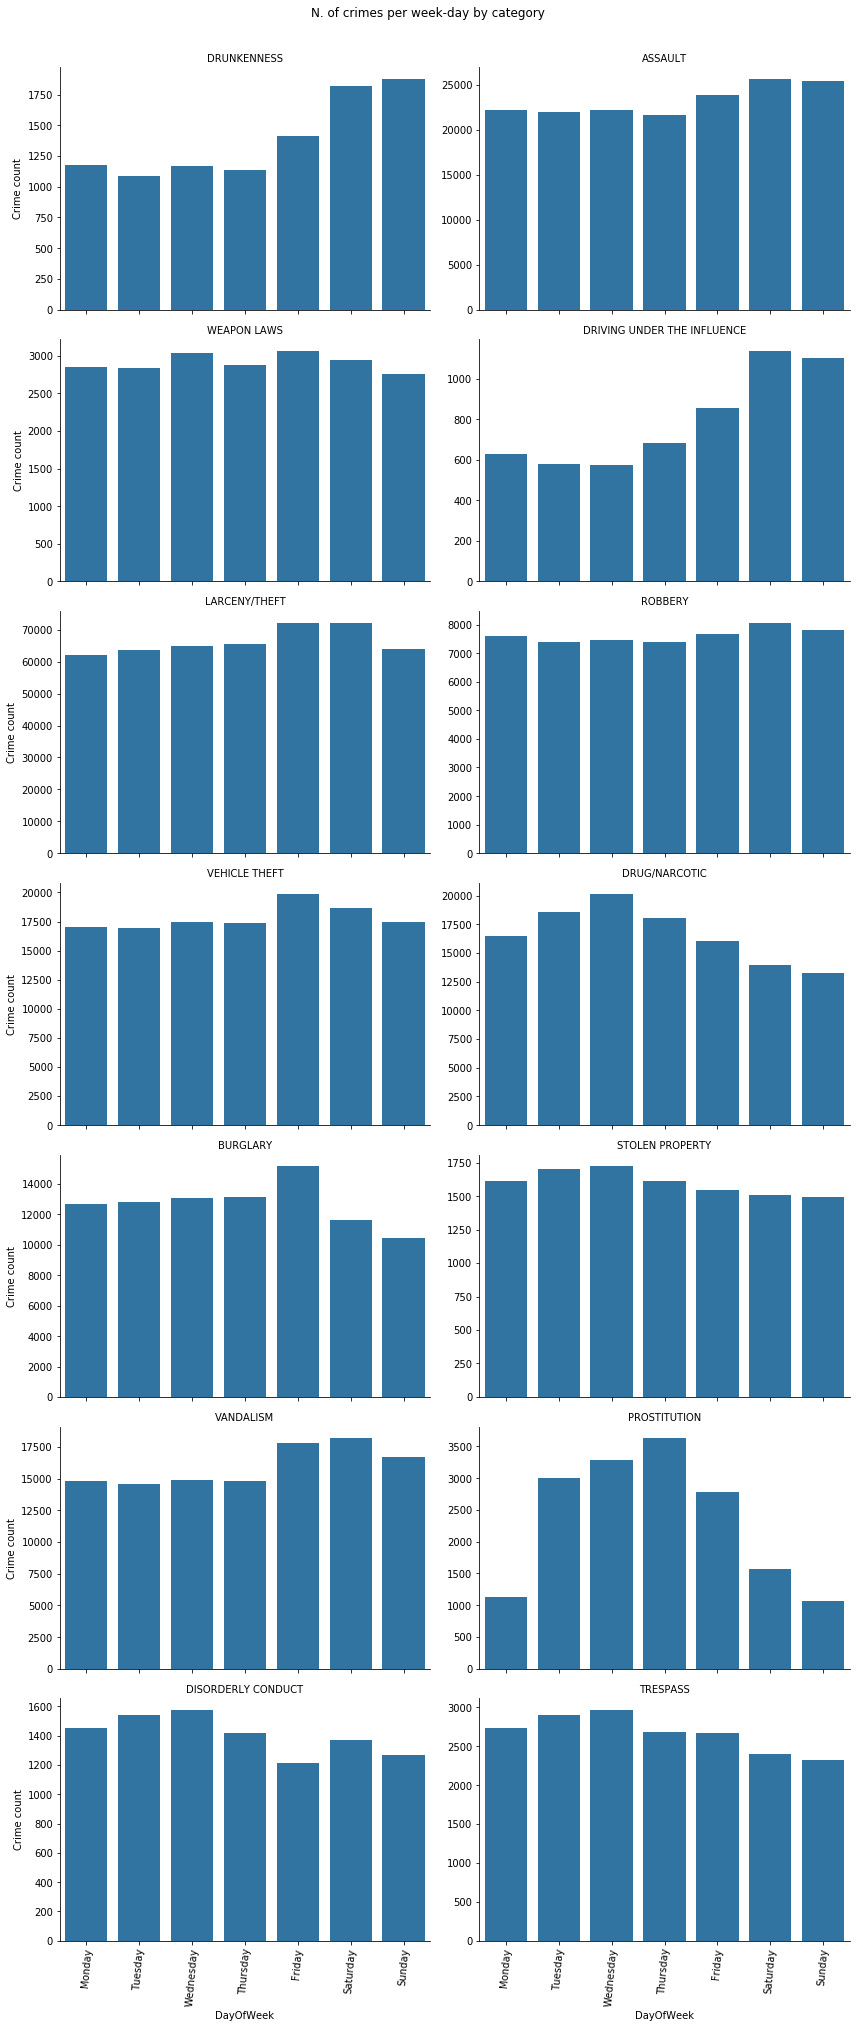

In [6]:
sorter = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorterIndex = dict(zip(sorter, range(len(sorter))))

df_plot = df.groupby([df.Category, df.DayOfWeek]).count().IncidntNum.reset_index()
df_plot['sort_idx'] = df_plot.DayOfWeek
df_plot['sort_idx'] = df_plot['sort_idx'].map(sorterIndex)
df_plot = df_plot.sort_values('sort_idx')

g = sns.FacetGrid(df_plot, col='Category', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "DayOfWeek", "IncidntNum")
g.set_ylabels('Crime count')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('N. of crimes per week-day by category')
plt.show()

Patterns in this visualization show more burglary on friday's, more prostitution in the middle of the week!, vehicle theft on fridays and drunkness on weekends. Funny enough, more people are caught with driving under the influence on a saturday probably due to hangovers haha. Finally, people like to do drugs in the middle of the week instead of the weekends, at least those who get caught do.

### Hours of the week

In [8]:
df['hour_of_the_week'] = df['Date'].dt.dayofweek * 24 + df['Date'].dt.hour

C:\Users\moeso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


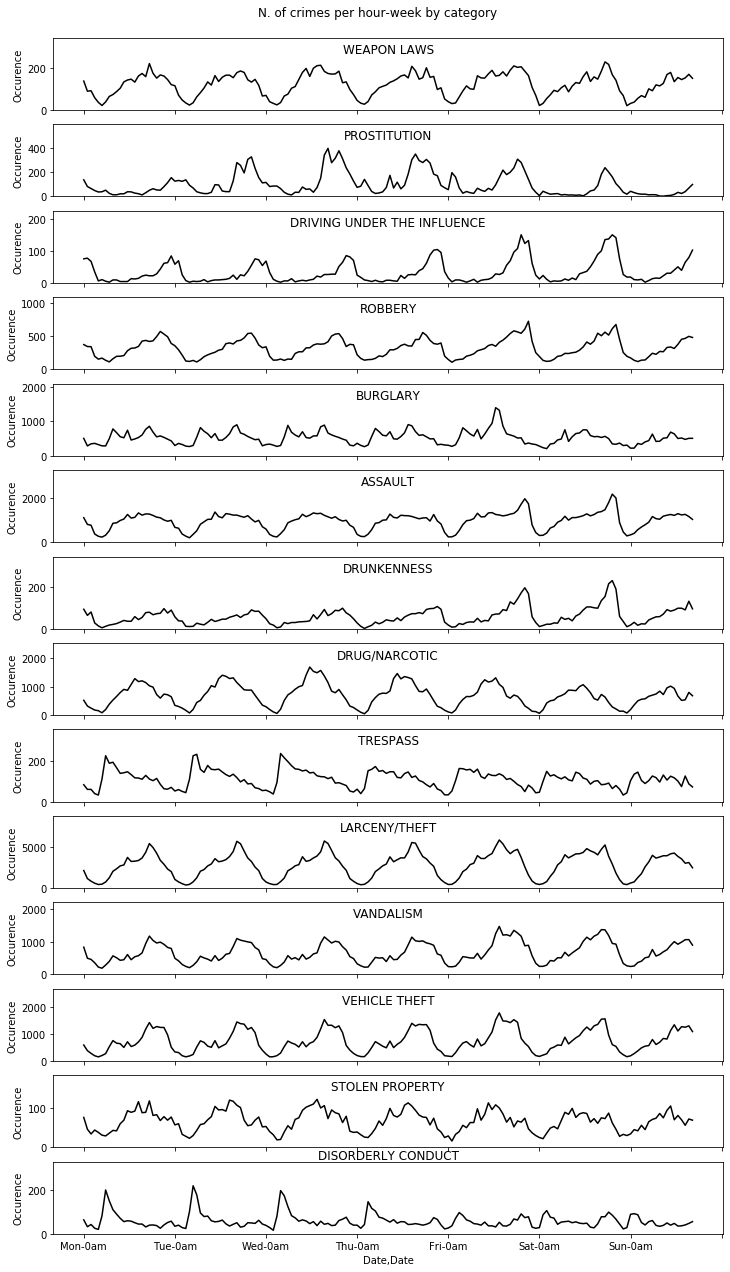

In [16]:
fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(12, 22), sharex=True)
fig.suptitle('N. of crimes per hour-week by category', y=0.9)

i = 0
for row in ax:
    crimeGroupByHourWeek = df[df['Category'] == focuscrimes[i]].groupby([df.Date.dt.weekday, df.Date.dt.hour]).size()
    crimeGroupByHourWeek.plot(ax=row, color='black')

    row.set_ylabel("Occurence")
    row.set_title(focuscrimes[i], y=1, pad=-15)
    row.set_ylim([0, 1.5 * crimeGroupByHourWeek.max()])
    row.set_xticklabels(['', 'Mon-0am', 'Tue-0am', 'Wed-0am', 'Thu-0am', 'Fri-0am', 'Sat-0am', 'Sun-0am', '', ''])

    i += 1

This plot is essentially a higher resolution plot of the 'weekly patterns' where we in addition to seeing the trends pr day of the week, we also see the hours per each day of the week. Overall, it shows the same patterns as the weekly patterns. However, we are able to spot a few patterns that were not apparent in the other plot. Such as disorderly conduct happening mostly in the first 3 days of the week in the morning. Moreover, the number of assaults and drunkenness also increase during the night on Friday's and Saturday's. Also, we know that there are more burglaries on Friday, but now we see that they happen late in the day.

### Spatial patterns

In [17]:
# Probability of crime per category
P_crime = df.groupby('Category').count()['IncidntNum'] / len(df)
P_crime = P_crime.rename('Prob')

In [18]:
# Count of crimes per category for each district
P_crime_district = (df.groupby(['PdDistrict', 'Category']).count()['IncidntNum']).reset_index()

# Crimes per district to normalize per district
crimes_pr_district = P_crime_district.groupby('PdDistrict').sum().to_dict()['IncidntNum']

In [19]:
# Normalize per district
P_crime_district['Prob'] = P_crime_district.apply(lambda x: x.IncidntNum / crimes_pr_district[x.PdDistrict], axis=1)

In [20]:
P_crime_district.Prob.sum()

10.0

We have 10 districts, so the sum of probabilities should be 10.

In [21]:
P_ratio = P_crime_district.join(P_crime, on='Category', lsuffix='District', rsuffix='City')
P_ratio['Ratio'] = P_ratio.ProbDistrict / P_ratio.ProbCity

In [22]:
P_ratio.head()

,PdDistrict,Category,IncidntNum,ProbDistrict,ProbCity,Ratio
0,BAYVIEW,ASSAULT,19538,0.178262,0.134314,1.327203
1,BAYVIEW,BURGLARY,9442,0.086147,0.073242,1.176200
2,BAYVIEW,DISORDERLY CONDUCT,538,0.004909,0.008099,0.606095
3,BAYVIEW,DRIVING UNDER THE INFLUENCE,448,0.004087,0.004577,0.893036
4,BAYVIEW,DRUG/NARCOTIC,9569,0.087306,0.095782,0.911503


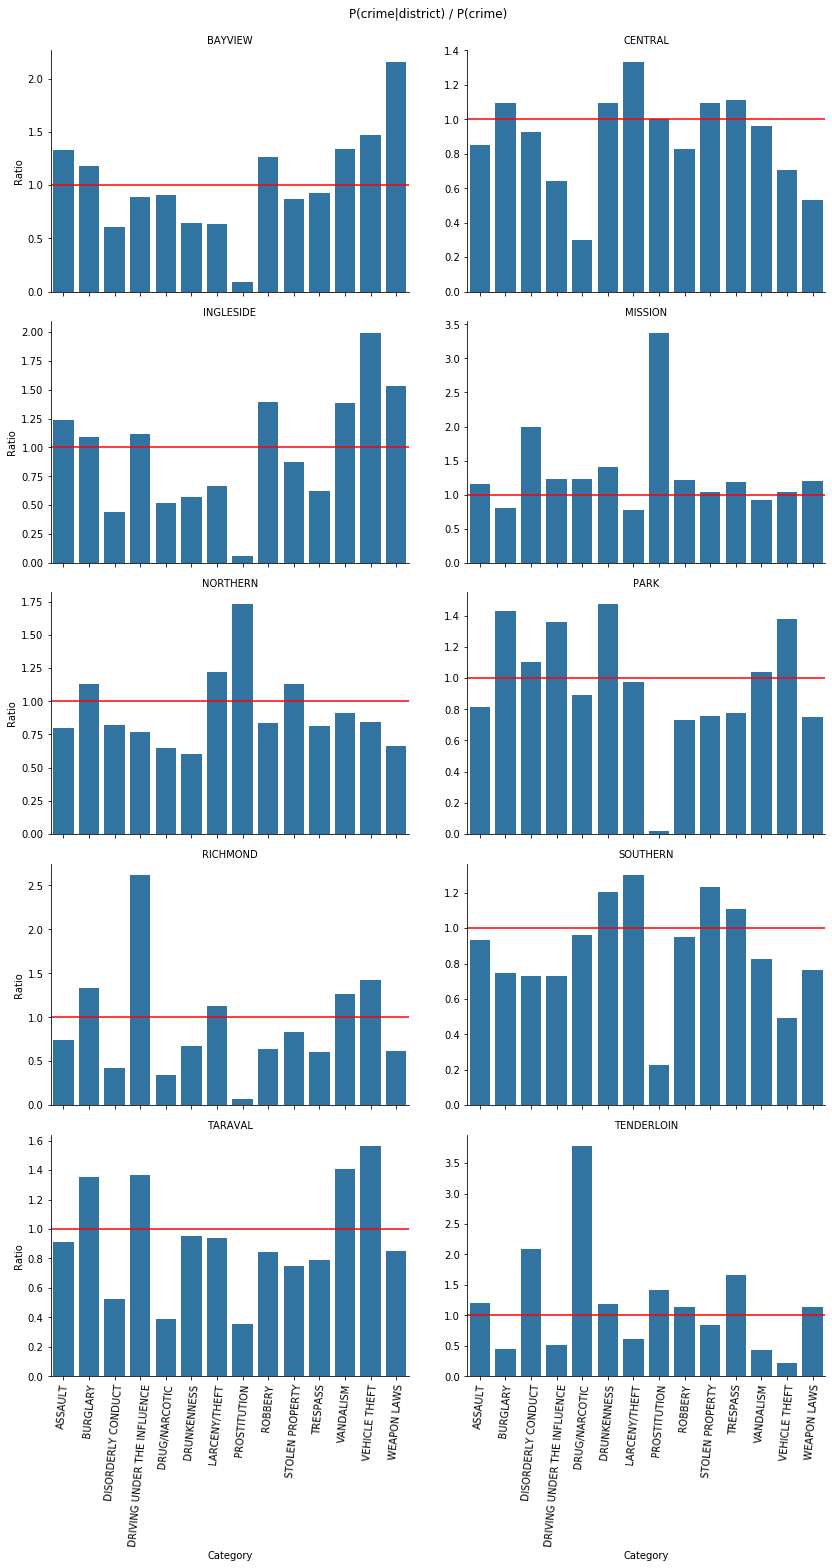

C:\Users\moeso\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


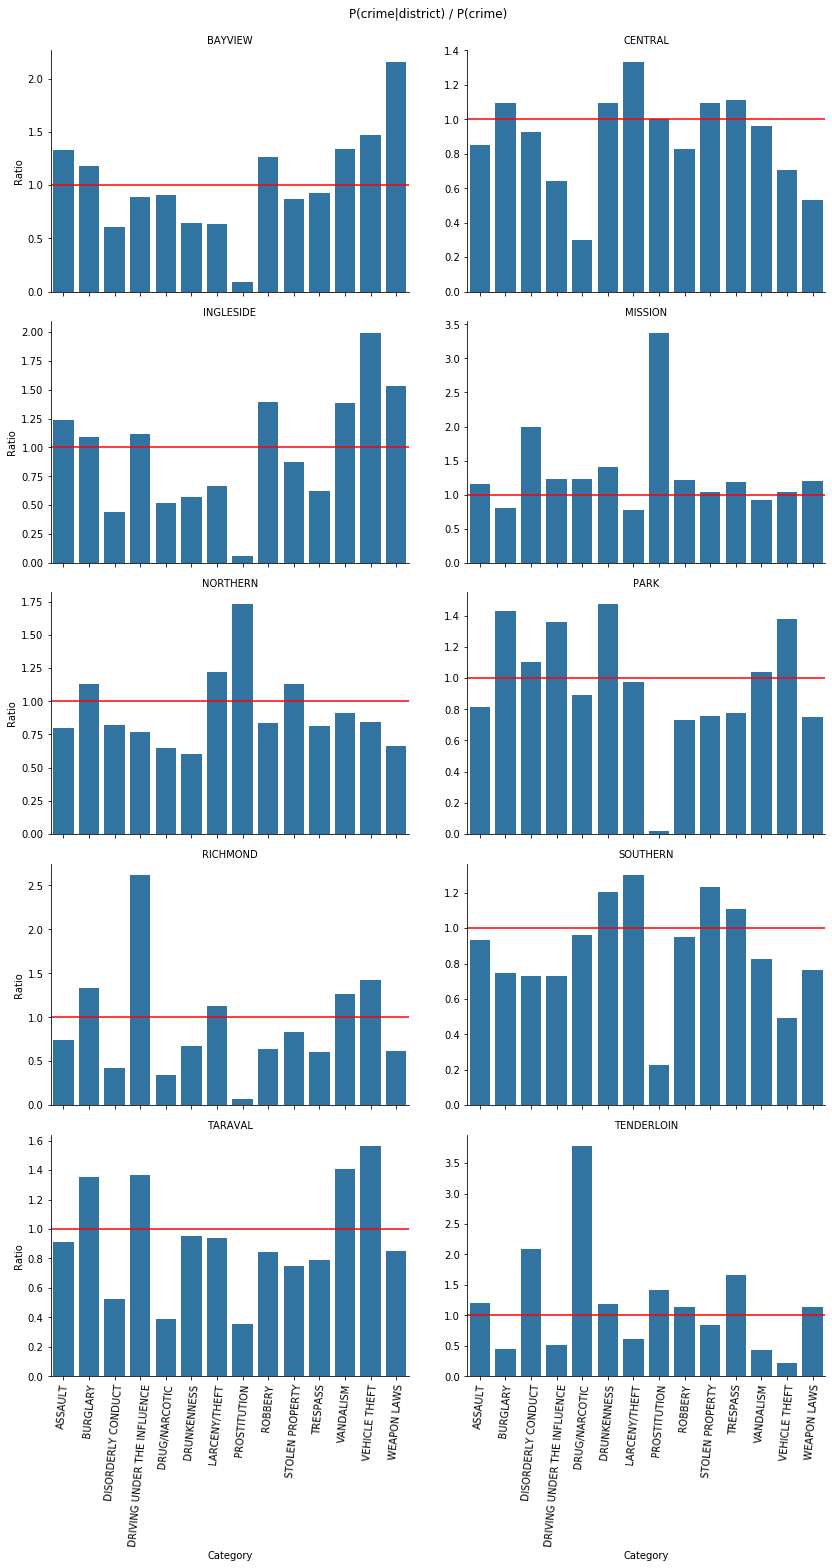

In [24]:
g = sns.FacetGrid(P_ratio, col='PdDistrict', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "Category", "Ratio")

for ax in g.axes:
    ax.axhline(1, color='red')

g.set_ylabels('Ratio')
g.set_xlabels('Category')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('P(crime|district) / P(crime)')
plt.show()

## Part 2: Fundamentals of data visualization

In the exercise below, there is a selection of questions from Week 3, Part 1. Please, check it out if you have any doubt on how to solve the exercise.

> *Exercise:* 
>
> * *Questions from the [lecture](https://www.youtube.com/watch?v=yiU56codNlI)*. Sune mentions in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 
> * *Hypothesis testing*. Use [data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv) and [data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv) to verify whether there is a statistically significant difference in the average number of steps taken by men and women. 
>     * Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in the previous step to define the right bin-size and comment on your choice.
>     * **Pretend you did not visualize the data yet.** What was the explanation you found for what you observed? Explain the theory, news, papers, further analysis etc. you used to support your conclusions and write down a couple of sentences. Now, think of the actual shape of the data: what do you think the point of this exercise was? 
> * *Scatter plots.* Create a scatter plot with both data samples by using **your own alternative** to `color='#f6756d'` and `color='#10bdc3'`. Explain why you chose this visualization, its pros, and cons.

### Questions from the lecture

> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
> **Answer:** The pearson correlation is defined as $\rho(x,y) = \frac{cov(x,y)}{\sigma_x\sigma_y}$ that is the covariance between x and y divided by their standard deviations multiplied. If $\rho > 0$ there is a positive correlation and $\rho < 0$ there is a negative correlation. For $\rho = 0$ there is no correlation. The pearson correlation can only capture linear correlation of variables, thus if we had $y = x**2$ then $\rho(x,y) = 0$ but the visualization would show a quadratic polynomial.
> * What is the difference between a bar-chart and a histogram?
> **Answer:** A bar-chart shows the count over some criteria or group, usually requires two variables. The histogram shows the frequency or density of one variable, thus showing its distribution.
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.
> **Answer:** A common approach is that $numberofbins = ceil( \frac{(maximumvalue - minimumvalue)}{binwidth})$ that accounts for the range of the data (width in the plot) divided by the bin width which gives you how many bins there are room for in the range.

### Hypothesis testing

### Scatter plots

## Part 3: Different types of visualization from DAOST

The exercise below, is a selection of questions from Week 3, Part 2 and 3.

> *Exercise:*
>
> * *Questions from DAOST*
>     * Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
>     * Explain what is a box plot. When are box plots most useful? Are violin plots better or worse than box plots? Why?
> * *Recreating plots from DAOST*. We need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.
>     * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>     * Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?
>     * Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it: 
>        * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>        * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. (Refer to Week 3 exercise 3.2 for hints.)      
>        * Now, you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results. 

## PART 4: Visualizing geo-data

Let's now use the cool Folium functionalites `HeatMap` and `HeatMapWithTime` to create a visualization of the patterns of your favorite crime-type and how they change over time. 

**Note** The exercise below is a mix of exercise 1.2 (**but with the data you choose**) and 1.3 from Week 4.

> *Exercise*: Heatmaps and heatmap movies. you get to make all the choices, but remember to **explain and motivate them**.
> * Start by choosing a crimetype with spatial patterns that change over time. Use your data-exploration from the previous lectures to choose a good one.
> * Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.
> * Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using `HeatMapWithTime`.
> * Comment on your results: 
>   - What patterns does your movie reveal?
>   - Motivate/explain the reasoning behind your choice of crimetype and time-resolution (you can also refer to exercises/visualizations that we have done in class to motivate your choice). 

## Part 5: Errors in the data. 

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
3. And, during Week 4 we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below:
>
> * In each of the examples above, describe in your own words how the data-errors, I call attention to above, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
> * Find your own example of human noise in the data and visualize it. Comment your results.